In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

# ALL INDIA PINCODE DIRECTORY

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, countDistinct, when, count, desc, collect_set, size, expr, trim, lower
# Create Spark session
spark = SparkSession.builder \
    .appName("PincodeData Analysis") \
    .getOrCreate()

In [3]:
df = spark.read.csv("PincodeData.csv", header=True, inferSchema=True)
df.show()

+------------+--------------------+--------------------+-----------------+-------+----------+--------+--------+---------+------------------+------------------+
|  circlename|          regionname|        divisionname|       officename|pincode|officetype|delivery|district|statename|          latitude|         longitude|
+------------+--------------------+--------------------+-----------------+-------+----------+--------+--------+---------+------------------+------------------+
|Bihar Circle|East Region Bhaga...|    Nalanda Division|   Tinalodipur BO| 801305|        BO|Delivery|   PATNA|    BIHAR|27.879999999999999|79.909999999999997|
|Bihar Circle|East Region Bhaga...|    Nalanda Division|        Mahuri BO| 803111|        BO|Delivery| NALANDA|    BIHAR|             25.16|85.439999999999998|
|Bihar Circle|East Region Bhaga...|    Nalanda Division|       Andhana BO| 803113|        BO|Delivery| NALANDA|    BIHAR|25.260000000000002|85.459999999999994|
|Bihar Circle|East Region Bhaga...|    N

# How many total records (rows) are present in the dataset?

In [4]:
# Count total number of rows
total_rows = df.count()
print(f"Total records (rows) in the dataset: {total_rows}")

Total records (rows) in the dataset: 165627


# How many unique pincodes are there in the data?

In [5]:
# Count number of unique pincodes
unique_pincodes = df.select("Pincode").distinct().count()
print(f"Total unique pincodes in the dataset: {unique_pincodes}")

Total unique pincodes in the dataset: 19586


# List all the column names and their data types.

In [6]:
# Print schema with data types
df.printSchema()

root
 |-- circlename: string (nullable = true)
 |-- regionname: string (nullable = true)
 |-- divisionname: string (nullable = true)
 |-- officename: string (nullable = true)
 |-- pincode: integer (nullable = true)
 |-- officetype: string (nullable = true)
 |-- delivery: string (nullable = true)
 |-- district: string (nullable = true)
 |-- statename: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)



# Find the total number of unique states

In [7]:
# Count total number of unique states
unique_states = df.select("statename").distinct().count()
print(f"Total unique states in the dataset: {unique_states}")

Total unique states in the dataset: 37


# How many distinct districts are present in the dataset?


In [8]:
unique_districts = df.select(countDistinct("district")).collect()[0][0]
print("Unique Districts:", unique_districts)

Unique Districts: 750


# Display the first 10 records to understand the data.


In [9]:
df.show(10, truncate=False)

+------------+---------------------+--------------------+-----------------+-------+----------+--------+--------+---------+------------------+------------------+
|circlename  |regionname           |divisionname        |officename       |pincode|officetype|delivery|district|statename|latitude          |longitude         |
+------------+---------------------+--------------------+-----------------+-------+----------+--------+--------+---------+------------------+------------------+
|Bihar Circle|East Region Bhagalpur|Nalanda Division    |Tinalodipur BO   |801305 |BO        |Delivery|PATNA   |BIHAR    |27.879999999999999|79.909999999999997|
|Bihar Circle|East Region Bhagalpur|Nalanda Division    |Mahuri BO        |803111 |BO        |Delivery|NALANDA |BIHAR    |25.16             |85.439999999999998|
|Bihar Circle|East Region Bhagalpur|Nalanda Division    |Andhana BO       |803113 |BO        |Delivery|NALANDA |BIHAR    |25.260000000000002|85.459999999999994|
|Bihar Circle|East Region Bhagalpu

# Which state has the highest number of pincodes?


In [10]:
df.groupBy("statename") \
  .agg(countDistinct("pincode").alias("total_pincodes")) \
  .orderBy(desc("total_pincodes")) \
  .show(1)

+----------+--------------+
| statename|total_pincodes|
+----------+--------------+
|TAMIL NADU|          2049|
+----------+--------------+
only showing top 1 row


# Find the number of pincodes available in each state.


In [11]:
df.groupBy("statename") \
  .agg(countDistinct("pincode").alias("pincode_count")) \
  .orderBy(desc("pincode_count")) \
  .show()

+----------------+-------------+
|       statename|pincode_count|
+----------------+-------------+
|      TAMIL NADU|         2049|
|   UTTAR PRADESH|         1668|
|     MAHARASHTRA|         1600|
|          KERALA|         1428|
|       KARNATAKA|         1359|
|  ANDHRA PRADESH|         1262|
|     WEST BENGAL|         1131|
|       RAJASTHAN|         1017|
|         GUJARAT|         1010|
|          ODISHA|          943|
|           BIHAR|          883|
|  MADHYA PRADESH|          778|
|       TELANGANA|          692|
|           ASSAM|          577|
|          PUNJAB|          531|
|HIMACHAL PRADESH|          439|
|       JHARKHAND|          388|
|              NA|          338|
|         HARYANA|          318|
|     UTTARAKHAND|          305|
+----------------+-------------+
only showing top 20 rows


# Identify the top 5 districts with the most pincodes.


In [12]:
df.groupBy("district") \
  .agg(countDistinct("pincode").alias("pincode_count")) \
  .orderBy(desc("pincode_count")) \
  .show(5)


+------------------+-------------+
|          district|pincode_count|
+------------------+-------------+
|                NA|          338|
|          THRISSUR|          168|
|              PUNE|          150|
|24 PARAGANAS NORTH|          144|
|         ERNAKULAM|          143|
+------------------+-------------+
only showing top 5 rows


# Count how many offices have delivery type as "Yes" and how many have "No".


In [13]:
df.groupBy("delivery").count().show()


+------------+------+
|    delivery| count|
+------------+------+
|    Delivery|157901|
|Non Delivery|  7726|
+------------+------+



# List all the unique office types (officetype) present in the dataset.


In [14]:
df.select("officetype").distinct().show()

+----------+
|officetype|
+----------+
|        HO|
|        PO|
|        BO|
+----------+



# Find how many regions (regionname) are present under each circle (circlename).


In [15]:
df.groupBy("circlename") \
  .agg(countDistinct("regionname").alias("region_count")) \
  .show()

+--------------------+------------+
|          circlename|region_count|
+--------------------+------------+
|      Haryana Circle|           2|
|    Rajasthan Circle|           4|
|        Bihar Circle|           4|
|    Jharkhand Circle|           2|
|        Delhi Circle|           1|
|          APS CIRCLE|           2|
|       Odisha Circle|           3|
|    Tamilnadu Circle|           4|
|  Maharashtra Circle|           6|
|  West Bengal Circle|           4|
|       Punjab Circle|           2|
|        Assam Circle|           2|
|      Gujarat Circle|           3|
|       Kerala Circle|           3|
|    Telangana Circle|           2|
|  Chattisgarh Circle|           2|
|Madhya Pradesh Ci...|           4|
|North Eastern Circle|           3|
|  Uttarakhand Circle|           2|
|Himachal Pradesh ...|           1|
+--------------------+------------+
only showing top 20 rows


# Check for any missing (null) vaues in the dataset.

In [16]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+----------+------------+----------+-------+----------+--------+--------+---------+--------+---------+
|circlename|regionname|divisionname|officename|pincode|officetype|delivery|district|statename|latitude|longitude|
+----------+----------+------------+----------+-------+----------+--------+--------+---------+--------+---------+
|         0|         0|           0|         0|      0|         0|       0|       0|        0|       0|        0|
+----------+----------+------------+----------+-------+----------+--------+--------+---------+--------+---------+



# How many divisions (divisionname) exist in each region?


In [17]:
df.groupBy("regionname") \
  .agg(countDistinct("divisionname").alias("division_count")) \
  .show()

+--------------------+--------------+
|          regionname|division_count|
+--------------------+--------------+
|  Navi Mumbai Region|             6|
|  Shillong HQ Region|             2|
|Prayagraj Regiona...|             4|
| Chennai City Region|            12|
|    Berhampur Region|             6|
| South Bengal Region|            10|
| Bengaluru HQ Region|             6|
|   Vijayawada Region|            13|
|  Srinagar HQ Region|             3|
|                  NA|            17|
|     Bareilly Region|            11|
|North East - II R...|             2|
|     WESTERN COMMAND|             1|
|Hyderabad City Re...|             6|
|    Gorakhpur Region|             6|
|            JAMMU RN|             3|
|       Indore Region|             7|
|Western Region Co...|            11|
|         Pune Region|            10|
| Ahmedabad HQ Region|             7|
+--------------------+--------------+
only showing top 20 rows


# Identify which circlename covers the largest number of districts.

In [18]:
df.groupBy("circlename") \
  .agg(countDistinct("district").alias("district_count")) \
  .orderBy(desc("district_count")) \
  .show(1)

+--------------------+--------------+
|          circlename|district_count|
+--------------------+--------------+
|North Eastern Circle|            85|
+--------------------+--------------+
only showing top 1 row


# Which combination of state and district has the highest number of offices?

In [19]:
df.groupBy("statename", "district") \
  .count() \
  .orderBy(desc("count")) \
  .show(1)


+--------------+--------+-----+
|     statename|district|count|
+--------------+--------+-----+
|ANDHRA PRADESH|  Y.S.R.|  819|
+--------------+--------+-----+
only showing top 1 row


# Find the top 3 regions having the most delivery offices.


In [20]:
from pyspark.sql.functions import col, desc, trim, lower

df.filter(lower(trim(col("delivery"))) == "yes") \
  .groupBy("regionname") \
  .count() \
  .orderBy(desc("count")) \
  .show(3)

+----------+-----+
|regionname|count|
+----------+-----+
+----------+-----+



# Calculate how many offices belong to each office type in every state.

In [21]:
df.groupBy("statename", "officetype") \
  .count() \
  .orderBy("statename") \
  .show()

+--------------------+----------+-----+
|           statename|officetype|count|
+--------------------+----------+-----+
|ANDAMAN AND NICOB...|        BO|   73|
|ANDAMAN AND NICOB...|        PO|   26|
|ANDAMAN AND NICOB...|        HO|    1|
|      ANDHRA PRADESH|        BO| 9100|
|      ANDHRA PRADESH|        PO| 1524|
|      ANDHRA PRADESH|        HO|   57|
|   ARUNACHAL PRADESH|        PO|   50|
|   ARUNACHAL PRADESH|        BO| 1120|
|   ARUNACHAL PRADESH|        HO|    1|
|               ASSAM|        BO| 3441|
|               ASSAM|        PO|  602|
|               ASSAM|        HO|   20|
|               BIHAR|        BO| 8226|
|               BIHAR|        HO|   33|
|               BIHAR|        PO| 1050|
|          CHANDIGARH|        BO|   10|
|          CHANDIGARH|        HO|    1|
|          CHANDIGARH|        PO|   42|
|        CHHATTISGARH|        BO| 4053|
|        CHHATTISGARH|        PO|  348|
+--------------------+----------+-----+
only showing top 20 rows


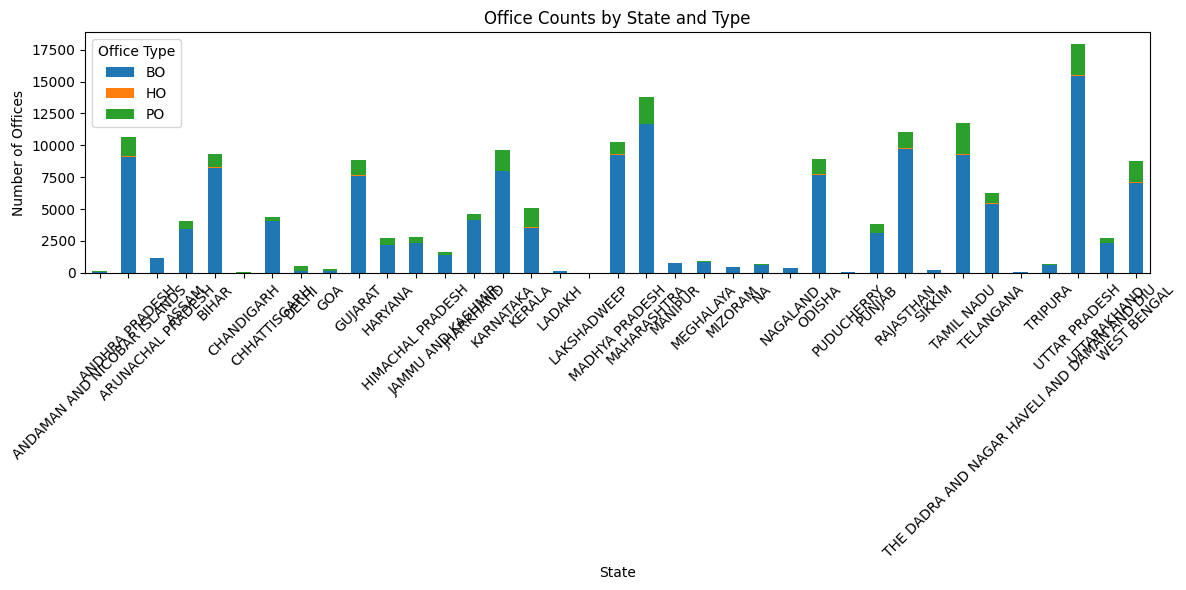

In [25]:
import matplotlib.pyplot as plt

# Aggregate the data
grouped_df = df.groupBy("statename", "officetype").count().toPandas()

# Pivot the data for plotting
pivot_df = grouped_df.pivot(index='statename', columns='officetype', values='count').fillna(0)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))

plt.title("Office Counts by State and Type")
plt.xlabel("State")
plt.ylabel("Number of Offices")
plt.xticks(rotation=45)
plt.legend(title='Office Type')
plt.tight_layout()
plt.show()

# Identify offices that have the same pincode but different officename (duplicates).


In [22]:
df.groupBy("pincode") \
  .agg(collect_set("officename").alias("offices")) \
  .filter(size(col("offices")) > 1) \
  .show(truncate=False)

+-------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|pincode|offices                                                                                                                                                                                                                      |
+-------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|110003 |[Safdarjung Air Port SO, Delhi High Court Extension Counter SO, Aliganj SO South Delhi, Kasturba Nagar SO South Delhi, Lodi Road HO, C G O Complex SO, Delhi High Court SO, Golf Links SO, Pragati Vihar SO, Pandara Road SO]|
|110016 |[Hauz Khas SO, Green Park Market SO, Hauz Khas Market SO, NIE C

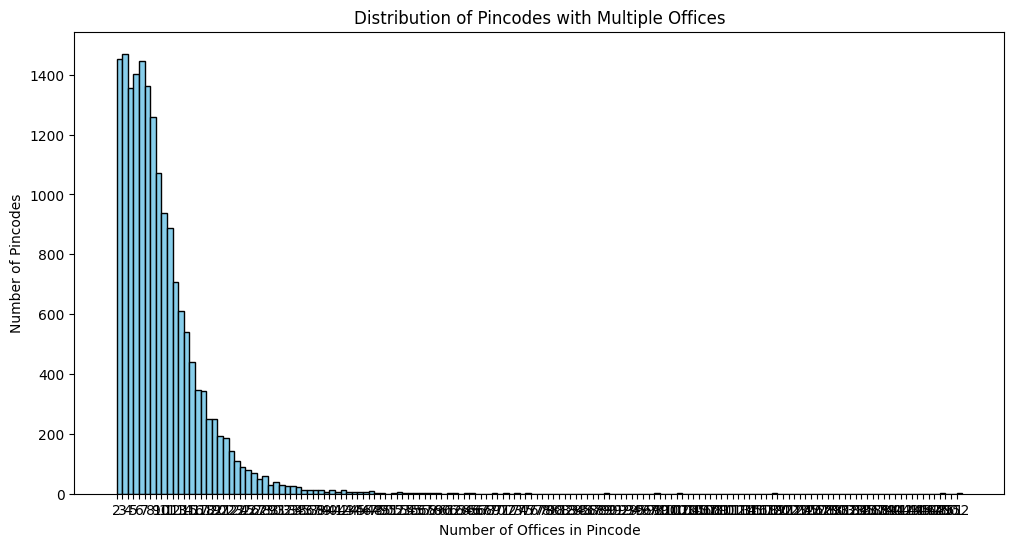

In [26]:
import matplotlib.pyplot as plt

from pyspark.sql.functions import size

# Aggregate and filter
pincode_df = df.groupBy("pincode") \
    .agg(collect_set("officename").alias("offices")) \
    .filter(size(col("offices")) > 1)

# Convert to Pandas for plotting
pincode_count = pincode_df.withColumn("num_offices", size(col("offices"))).toPandas()

# Plot
plt.figure(figsize=(12,6))
plt.hist(pincode_count['num_offices'], bins=range(2, pincode_count['num_offices'].max()+2), color='skyblue', edgecolor='black')
plt.title("Distribution of Pincodes with Multiple Offices")
plt.xlabel("Number of Offices in Pincode")
plt.ylabel("Number of Pincodes")
plt.xticks(range(2, pincode_count['num_offices'].max()+1))
plt.show()

# Using latitude and longitude, determine if there are any offices with missing or invalid location coordinates (null or zero).

In [23]:
df_clean_bigint = df.withColumn("latitude", expr("try_cast(latitude AS BIGINT)")) \
                    .withColumn("longitude", expr("try_cast(longitude AS BIGINT)"))

# Filter invalid/missing coordinates
invalid_offices_bigint = df_clean_bigint.filter(
    (col("latitude").isNull()) | 
    (col("longitude").isNull()) |
    (col("latitude") == 0) | 
    (col("longitude") == 0)
)

invalid_offices_bigint.show()


+------------+--------------------+--------------------+-----------------+-------+----------+--------+--------+---------+--------+---------+
|  circlename|          regionname|        divisionname|       officename|pincode|officetype|delivery|district|statename|latitude|longitude|
+------------+--------------------+--------------------+-----------------+-------+----------+--------+--------+---------+--------+---------+
|Bihar Circle|East Region Bhaga...|    Nalanda Division|   Tinalodipur BO| 801305|        BO|Delivery|   PATNA|    BIHAR|    NULL|     NULL|
|Bihar Circle|East Region Bhaga...|    Nalanda Division|        Mahuri BO| 803111|        BO|Delivery| NALANDA|    BIHAR|    NULL|     NULL|
|Bihar Circle|East Region Bhaga...|    Nalanda Division|       Andhana BO| 803113|        BO|Delivery| NALANDA|    BIHAR|    NULL|     NULL|
|Bihar Circle|East Region Bhaga...|    Nalanda Division|     Barakhurd BO| 803113|        BO|Delivery| NALANDA|    BIHAR|    NULL|     NULL|
|Bihar Circle

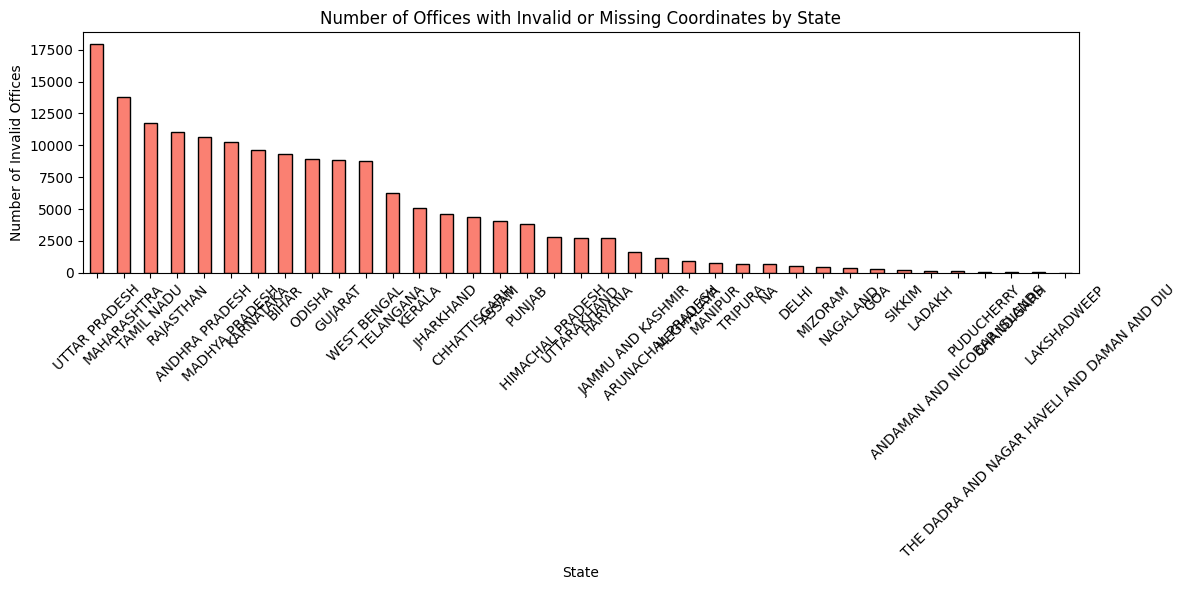

In [28]:
import matplotlib.pyplot as plt

# Convert to Pandas
invalid_df = invalid_offices_bigint.toPandas()

# Count of invalid offices by state
state_counts = invalid_df['statename'].value_counts()

# Plot
plt.figure(figsize=(12,6))
state_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Number of Offices with Invalid or Missing Coordinates by State")
plt.xlabel("State")
plt.ylabel("Number of Invalid Offices")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()